In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [21]:
# Chargement des données
from scipy.io import loadmat
data_at1 = loadmat('Données/data_at1.mat') 
# data_at1 est un dictionnaire 
#on extrait les données
data1=data_at1 ["data"]

v= np.var(data1) ; m=data1.mean()
print("la variance et la moyenne des données sont respectivement: \n ",v, "et \n", m )


la variance et la moyenne des données sont respectivement: 
  14.684951763618356 et 
 4.20105092567748


**QUESTION 1**

C:\Users\michel.dione\AppData\Local\Temp\ipykernel_3736\3701499796.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=1, color='red')


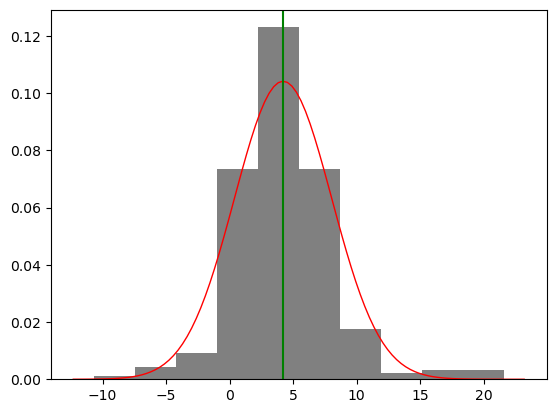

In [22]:
#Histogramme (hist)
from scipy.stats import norm

plt.hist(data1, density=True, color='gray')

mu, std = norm.fit(data1) # Ajustement de la courbe de densité avec une distribution normale
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, color='red')
plt.axvline(x=m,color='green')
plt.show()


Sur ce graphe nous pouvons constater que la distribution des données est quasiment normale avec une moyenne 4,20 et une variance de 14,60.


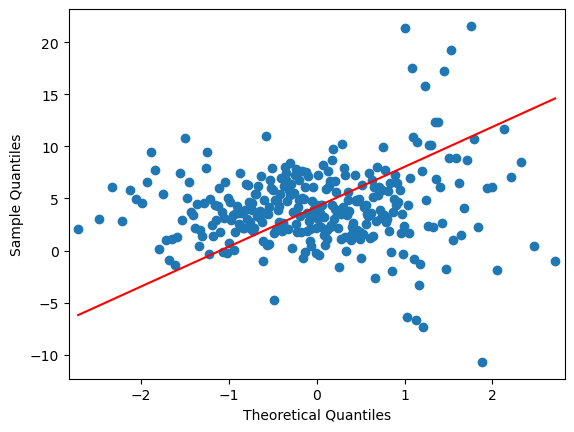

In [23]:
#Le QQ_plot

import statsmodels.api as sm

sm.qqplot(data1, line='s')  # 's' pour une ligne droite
plt.show()

Sur ce graphe nous avons: 
* En abcisse les quantiles théoriques attendus pour une distribution normale
* En ordonnées les quantiles des données 
Nous y avons représenté le nuage de points formé par les données.

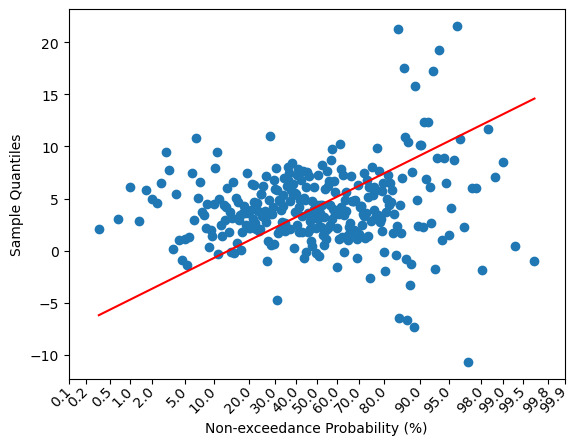

In [24]:
# Tracer un graphique de probabilité normale
sm.ProbPlot(data1).probplot(line='s')  
plt.show()

Sur ce graphe nous avons:
* En abcisse les probabilités théoriques attendues pour une distribution normale
* En ordonnées les quantiles de nos  données.
Nous y avons répresenté le nuage de point de notre jeu de donnnées.


Si on se référe au principe des deux derniéres fonctions, nous avons que plus les points du nuage sont concentrés autours de la droite (en rouge) plus la distribution des données est normales et inversement, plus ces derniers s'éloignent de la droite, plus les données s'éloignent d'une distribution normale.

Ainsi donc en comparant ces 3 graphes, nous pouvons dire que la fonction **hist** est plus adaptée   à nos données que les 2 autres pour mettre en évidence une éventuelle normalité de la distribution des données.

**QUESTION 2** : La fonction *norm.fit*

In [34]:
from scipy.stats import norm

# Estimation des paramètres de la distribution normale (la moyenne et la covariance)
moy, cov = norm.fit(data1)

print("La moyenne et la covariance estimées sont respectivement :\n", moy, "et \n", cov )


La moyenne et la covariance estimées sont respectivement :
 4.20105092567748 et 
 3.832094957541939


In [17]:
# Détection des valeurs aberrantes (par rapport aux quantiles Q3 et Q1)

Q1=np.percentile(data1,0.25)
Q3=np.percentile(data1,0.75)
IQR = Q3 - Q1
seuil_inf=-2 #Q1-0.5*IQR
seuil_sup=10 #Q3+0.5*IQR


data2=data1[(data1 < seuil_sup) & (data1 > seuil_inf)]


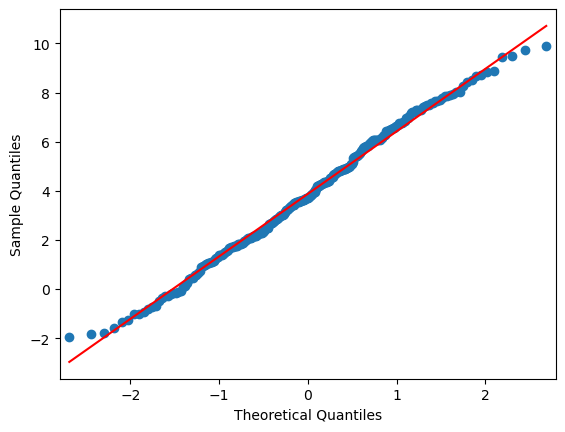

In [18]:
#import statsmodels.api as sm

sm.qqplot(data2, line='s')  # 's' pour une ligne droite
plt.show()

In [52]:
from scipy.stats import jarque_bera

#On effectue le test de Jarque-Bera
stat1, p_val1=jarque_bera(data1)

stat2, p_val2=jarque_bera(data2)

print("les résultats du test de JB sur les données initiales  :\n", "stat de test=", stat1, "p_value=", p_val1 )

print("les résultats du test de JB sur les données nettoyées  :\n", "stat de test=", stat2, "p_value=", p_val2 )

les résultats du test de JB sur les données initiales  :
 stat de test= 251.37257292599776 p_value= 2.6009939272107992e-55
les résultats du test de JB sur les données nettoyées  :
 stat de test= 10.677728552143458 p_value= 0.004801320589612368


En comparant les **p_valeurs** de ces deux tests nous pouvons remarquer que la p_valeur pour le test sur les données 'nettoyées'  est beaucoup plus grande que celle sur les données initiales. 

Ainsi donc on peut penser que le fait de supprimer les aberrantes sur nos données peut permettre de s'approcher au mieux à une distribution normale.